In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/home/ronodeep/thesisfinal/Cases Meta data.csv")

In [4]:
data.head()

,Case Number,CaseID,HPV,Adequacy,Reason,Squamocolumnar junction visibility,Transformation zone,Original squamous epithelium,Columnar epithelium,Metaplastic squamous epithelium,...,Additional miscellaneous finding,Aceto uptake,Margins,Vessels,Lesion size,Iodine uptake,SwedeFinal,\nProvisional diagnosis,Management,Histopathology
0,1,AAAW,Positive,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,Nabothian cysts,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Faintly or patchy yellow,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done
1,2,AADE,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy present,Crypt (gland) openings,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
2,3,AADG,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,Crypt (gland) openings,...,NaN,Nil or transparent,Nil or diffuse,Absent,< 5 mm,Brown,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
3,4,AAEG,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,NaN,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
4,5,AAER,Positive,Adequate,NaN,Completely visible,Type 2,Mature,NaN,NaN,...,NaN,Nil or transparent,Nil or diffuse,Absent,">15 mm, 3-4 quadrants, or endocervically undef...",Faintly or patchy yellow,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done


In [5]:
data = data.dropna(axis = 1)

In [6]:
data.head()

,Case Number,CaseID,HPV,Adequacy,SwedeFinal,\nProvisional diagnosis,Management,Histopathology
0,1,AAAW,Positive,Adequate,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done
1,2,AADE,Negative,Adequate,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
2,3,AADG,Negative,Adequate,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
3,4,AAEG,Negative,Adequate,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
4,5,AAER,Positive,Adequate,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done


In [7]:
data = data.drop(columns=["Case Number"])

In [8]:
data.head()

,CaseID,HPV,Adequacy,SwedeFinal,\nProvisional diagnosis,Management,Histopathology
0,AAAW,Positive,Adequate,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done
1,AADE,Negative,Adequate,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
2,AADG,Negative,Adequate,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
3,AAEG,Negative,Adequate,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
4,AAER,Positive,Adequate,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done


In [9]:
# Find unique values in the 'status' column
unique_values = data['Histopathology'].unique()

# Print unique values
print(unique_values)

['Not done' 'Normal'
 'Tuberculosis of cervix with giant cells and granulation tissue'
 'LSIL-CIN1' 'HSIL-CIN2' 'HSIL-CIN3'
 'HSIL-CIN3; LSIL-CIN1 in the anterior lip'
 'Cervical histopathology was invasive squamous cell cancer, vaginal histopathology was HSIL-VAIN 3, and vulvar histopathology was HSIL-VIN 3'
 'Microinvasive squamous cell cancer' 'Invasive squamous cell carcinoma'
 'Microinvasive squamous cell carcinoma' 'Squamous cell carcinoma'
 'Adenocarcinoma in situ' 'Adenocarcinoma' 'Mucous polyp'
 'LSIL-HPV changes']


In [10]:
type(unique_values)

numpy.ndarray

In [11]:
import numpy as np

In [12]:
for i in unique_values:
    print(i, np.where(unique_values==i)[0][0])

Not done 0
Normal 1
Tuberculosis of cervix with giant cells and granulation tissue 2
LSIL-CIN1 3
HSIL-CIN2 4
HSIL-CIN3 5
HSIL-CIN3; LSIL-CIN1 in the anterior lip 6
Cervical histopathology was invasive squamous cell cancer, vaginal histopathology was HSIL-VAIN 3, and vulvar histopathology was HSIL-VIN 3 7
Microinvasive squamous cell cancer 8
Invasive squamous cell carcinoma 9
Microinvasive squamous cell carcinoma 10
Squamous cell carcinoma 11
Adenocarcinoma in situ 12
Adenocarcinoma 13
Mucous polyp 14
LSIL-HPV changes 15


In [13]:
data['Histopathology_numaric'] = data['Histopathology'].apply(lambda x: np.where(unique_values==x)[0][0])

In [14]:
data['HPV'] = data["HPV"].apply(lambda x: 1 if x=="Positive" else 0)

In [15]:
data['Adequacy'] = data["Adequacy"].apply(lambda x: 1 if x=="Adequate" else 0)

In [16]:
data.head()

,CaseID,HPV,Adequacy,SwedeFinal,\nProvisional diagnosis,Management,Histopathology,Histopathology_numaric
0,AAAW,1,1,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done,0
1,AADE,0,1,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done,0
2,AADG,0,1,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done,0
3,AAEG,0,1,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done,0
4,AAER,1,1,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done,0


In [17]:
u = data["Histopathology_numaric"].unique()
print(u)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [18]:
u_SwedeFinal = data["SwedeFinal"].unique()
print(u_SwedeFinal)

[ 1  0  4 99  3  2  5  6  9  7  8 10]


In [19]:
u_Adequacy = data["Adequacy"].unique()
print(u_Adequacy)

[1 0]


In [20]:
u_diagnosis = data["\nProvisional diagnosis"].unique()
print(u_diagnosis)

['Type 1 transformation zone; normal' 'Type 2 transformation zone; normal'
 'Type 3 transformation zone; normal'
 'Type 2 transformation zone; normal cervix with atrophic change'
 'Type 3 transformation zone; normal cervix with atrophic change'
 'Type 1 transformation zone; normal with pregnancy-induced changes'
 'Type 1 transformation zone; normal with ectropion'
 'Type 1 transformation zone; low-grade Squamous intraepithelial lesion (LSIL) with ectropion'
 'Type 1 transformation zone; low-grade squamous intraepithelial lesion (LSIL)'
 'Type1 transformation zone; normal with ectropion'
 'Type 1 transformation zone; normal with evidence of candida infection'
 'Type 1 transformation zone; normal with evidence of trichomoniasis'
 'Type 1 transformation zone; normal with evidence of <i>Trichomonas vaginalis</i>'
 'Type 1 transformation zone; cervicitis'
 'Inadequate colposcopy due to severe vaginal infection'
 'Tuberculosis ulcer of cervix' 'Tuberculosis ulcer of cervix healed'
 'Type 1 t

In [21]:
print(len(u_diagnosis))

58


In [22]:
data.shape

(200, 8)

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

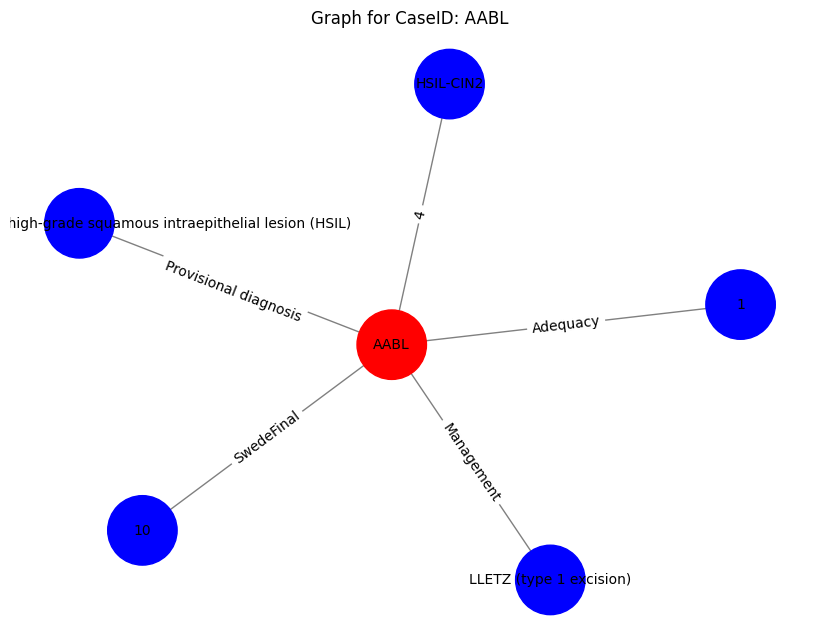

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Select the first row
row = data.iloc[100]

# Create a Graph
G = nx.Graph()

# Add the CaseID node
case_id = row["CaseID"]
G.add_node(case_id, type="Case", color="red")

# Define columns to connect
columns = ["HPV", "Adequacy", "SwedeFinal", "\nProvisional diagnosis", "Management", "Histopathology"]

# Add Nodes and Edges
for col in columns:
    value = str(row[col])  # Convert to string
    if not pd.isna(value):  # Skip NaN values
        G.add_node(value, type=col, color="blue")  # Create a node for feature
        G.add_edge(case_id, value, label=col)  # Connect CaseID to feature

# Add edge for Histopathology using Histopathology_numaric value
histopathology_numeric = row["Histopathology_numaric"]
if not pd.isna(histopathology_numeric):
    G.add_edge(case_id, row["Histopathology"], label=histopathology_numeric)  # Edge with numeric label

# Draw the Graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positioning

# Set colors for nodes
colors = ["red" if G.nodes[n]["type"] == "Case" else "blue" for n in G.nodes]

# Draw the graph with the proper coloring
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color="gray", node_size=2500, font_size=10)

# Draw edge labels
edge_labels = {(case_id, n): G[case_id][n]["label"] for n in G[case_id]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Graph for CaseID: {case_id}")
plt.show()


{('AAAW', '1'): Text(-0.16174331159574995, 0.13673703521166547, 'SwedeFinal'),
 ('AAAW',
  'Type 1 transformation zone; normal'): Text(-0.2890096148602581, 0.1625889569652028, '\nProvisional diagnosis'),
 ('AAAW',
  'Repeat HPV test/colposcopy after 1 year'): Text(-0.36036552730251037, 0.30270690985241133, 'Management'),
 ('AAAW', 'Not done'): Text(-0.2876932903477132, 0.17029971613650097, '0'),
 ('1', 'AAAW'): Text(-0.16174069914099953, 0.13673520998644073, 'SwedeFinal'),
 ('1', 'AADE'): Text(-0.13712648887856194, -0.028214761823401657, 'Adequacy'),
 ('1', 'AADG'): Text(-0.18886199001896364, 0.011346612821641955, 'SwedeFinal'),
 ('1', 'AAEG'): Text(-0.08533928979519456, 0.050513012785996736, 'Adequacy'),
 ('1', 'AAER'): Text(-0.19919180001198178, 0.0690831511726191, 'Adequacy'),
 ('1', 'AAFU'): Text(-0.15579259796841183, -0.031435990955953175, 'Adequacy'),
 ('1',
  'AAFY'): Text(-0.15370539579396414, -0.004068176896063758, 'SwedeFinal'),
 ('1', 'AAFZ'): Text(-0.050355518400749144, 0.0

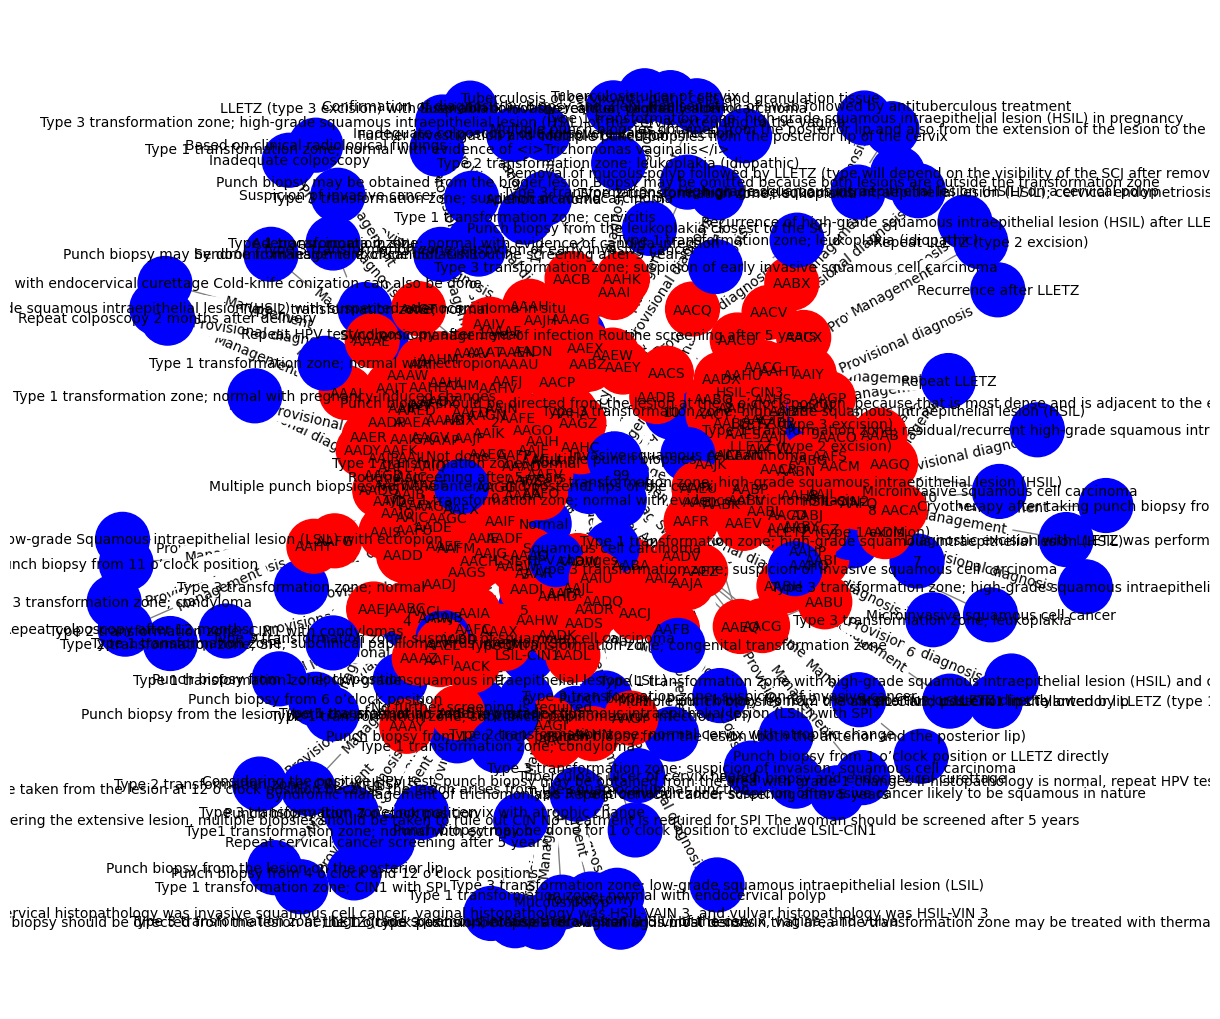

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Create a Graph
G = nx.Graph()

# Iterate over all rows (patients)
for _, row in data.iterrows():
    case_id = row["CaseID"]
    G.add_node(case_id, type="Case", color="red")  # Add the CaseID node

    # Define columns to connect to each case
    columns = ["HPV", "Adequacy", "SwedeFinal", "\nProvisional diagnosis", "Management", "Histopathology"]

    # Add nodes for each feature and create edges from CaseID to the feature
    for col in columns:
        value = str(row[col])  # Convert to string
        if not pd.isna(value):  # Skip NaN values
            G.add_node(value, type=col, color="blue")  # Create a node for the feature
            G.add_edge(case_id, value, label=col)  # Connect CaseID to feature

    # Add edge for Histopathology using Histopathology_numaric value
    histopathology_numeric = row["Histopathology_numaric"]
    if not pd.isna(histopathology_numeric):
        G.add_edge(case_id, row["Histopathology"], label=histopathology_numeric)  # Edge with numeric label

# Optionally, save the graph data to a GML file
nx.write_gml(G, "cervix_cancer_graph.gml")

# Visualize the graph for the first few rows
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Positioning

# Set colors for nodes (red for Case, blue for features)
colors = ["red" if G.nodes[n]["type"] == "Case" else "blue" for n in G.nodes]

# Draw the graph with the proper coloring
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color="gray", node_size=1500, font_size=10)

# Draw edge labels for the connections
edge_labels = {(case_id, n): G[case_id][n]["label"] for case_id in G.nodes for n in G[case_id] if "label" in G[case_id][n]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


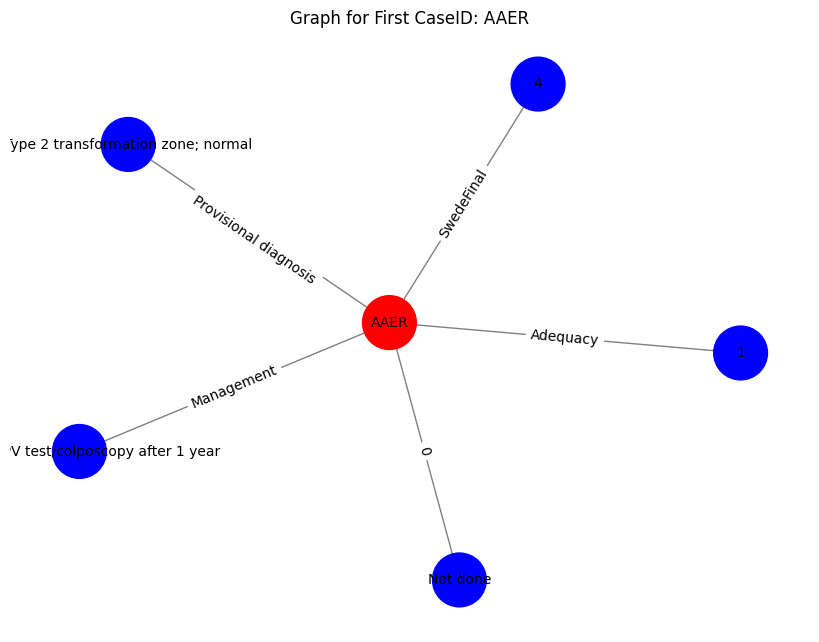

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from the GML file
G = nx.read_gml("cervix_cancer_graph.gml")

# Get the first CaseID node (assuming nodes are labeled with CaseIDs as 'Case' type)
first_case_id = list(G.nodes)[10]  # Getting the first node (assuming the first node is CaseID)

# Draw the first CaseID and its edges
plt.figure(figsize=(8, 6))

# Create a subgraph containing the first node and its neighbors
subgraph_nodes = list(G.neighbors(first_case_id)) + [first_case_id]
subgraph = G.subgraph(subgraph_nodes)

# Set colors for nodes (red for CaseID, blue for features)
colors = ["red" if G.nodes[n]["type"] == "Case" else "blue" for n in subgraph.nodes]

# Draw the subgraph with labels and node coloring
pos = nx.spring_layout(subgraph)  # Positioning the nodes
nx.draw(subgraph, pos, with_labels=True, node_color=colors, edge_color="gray", node_size=1500, font_size=10)

# Draw edge labels for the connections
edge_labels = {(u, v): subgraph[u][v]["label"] for u, v in subgraph.edges()}
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

# Title and display
plt.title(f"Graph for First CaseID: {first_case_id}")
plt.show()